#Ejercicio 9

Dado un grafo bipartito no dirigido, un match es un subconjunto de las aristas en el cual para todo vértice
v
v a lo sumo una arista del match incide en
v
v (en el match, tienen grado a lo sumo 1). Decimos que el vértice
v
v está matcheado si hay alguna arista que incida en él (sino, está unmatcheado). El matching máximo es aquel en el que tenemos la mayor cantidad de aristas (matcheamos la mayor cantidad posible). Dar una metodología para encontrar el matching máximo de un grafo, explicando en detalle cómo se modela el problema, cómo se lo resuelve y cómo se consigue el matching máximo. ¿Cuál es el orden temporal de la solución implementada?

##Planteamiento

La idea es resolverlo por Ford Fulkerson, pero para ello es necesario convertir el grafo en una red de flujo realizando los siguientes ajustes:

*   Es necesario orientar el grafo, para lograrlo se convierten las aristas del grafo bipartito en un aristas dirigidas que partan del conjunto de vértices ubicados del lado izquierdo $L$ hasta el conjunto de vértices ubicados del lado derecho $R$. En caso de que el enunciado no nos dé la orientación, es necesario biparticionar el grafo en L y R

*   Se crea una fuente y un sumidero. Se crea un nodo fuente llamado $s$ que esté conectado a cada elemento $\in L$ y que tenga una capacidad adecuada. Luego se crea un nodo sumidero $t$ que permitirá conectar todos los elemntos de $R$ a $t$

*   Se pondera el grafo, se le asigna a cada arista un peso = 1. con capacidades unitarias, un flujo máximo de valor 𝑘 corresponde exactamente a un matching de tamaño 𝑘. Como cada nodo sólo permitirá flujo total 1 a través suyo (por las conexiones de 1), no podrá emparejarse con más de un vecino simultáneamente — por eso el método produce un matching válido. Para obtener perfect matching se verifica si el flujo máximo es igual al número de vértices de uno de los lados (o al número total de vértices dividido por 2, según conveniencia).

* Se procede a ejecutar Ford-Fulkerson sobre la red construida.



In [ ]:
from queue import Queue

class Grafo:
    def __init__(self, es_dirigido, lista_vertices):
        self.es_dirigido = es_dirigido
        self.vertices = {}
        for vertice in lista_vertices:
            self.vertices[vertice] = {}

    def __contains__(self, v):
        return v in self.vertices

    def __len__(self):
        return len(self.vertices)

    def __iter__(self):
        return iter(self.vertices)

    def agregar_vertice(self, vertice):
        if vertice in self:
            return
        self.vertices[vertice] = {}

    def agregar_arista(self, vertice1, vertice2, peso=1):
        if vertice1 not in self:
            self.agregar_vertice(vertice1)
        if vertice2 not in self:
            self.agregar_vertice(vertice2)
        self.vertices[vertice1][vertice2] = peso
        if not self.es_dirigido:
            self.vertices[vertice2][vertice1] = peso

    def borrar_vertice(self, vertice):
        if vertice not in self:
            return
        lista_vertices = list(self.vertices.keys())
        for vecino in lista_vertices:
            if vertice in self.vertices[vecino]:
                self.vertices[vecino].pop(vertice, None)

        del self.vertices[vertice]

    def modificar_peso(self, vertice1, vertice2, peso):
        if vertice1 not in self.vertices or vertice2 not in self.vertices:
            return

        if vertice2 not in self.vertices[vertice1]:
            return

        self.vertices[vertice1][vertice2] = peso
        if not self.es_dirigido:
            self.vertices[vertice2][vertice1] = peso

    def estan_unidos(self, vertice_1, vertice2):
        if vertice_1 not in self.vertices or vertice2 not in self.vertices:
            return False
        return vertice2 in self.vertices[vertice_1]

    def obtener_vertices(self):
        return list(self.vertices.keys())

    def es_bipartito(self):
      colores = {}
      lista_vertices = list(self.vertices.keys())
      for vertice in lista_vertices:
          if vertice not in colores:
              cola = Queue()
              cola.put(vertice)
              colores[vertice] = 0

              while not cola.empty():
                  actual = cola.get()
                  for vecino in self.vertices[actual]:
                      if vecino not in colores:
                          colores[vecino] = 1 - colores[actual]
                          cola.put(vecino)
                      elif colores[vecino] == colores[actual]:
                          return False
      return True

    def obtener_particion(self):
        """
        Precondiciones: el grafo debe estar correctamente definido (self.vertices es un diccionario válido).
        El grafo no debe contener vértices huérfanos (sin clave en self.vertices).
        Postcondiciones: devuelve dos conjuntos disjuntos L y R tales que cada arista conecta un vértice de L con uno de R.
        Si el grafo no es bipartito, devuelve (None, None).
        """
        colores = {}
        conjunto_L = set()
        conjunto_R = set()
        lista_vertices = list(self.vertices.keys())

        for vertice in lista_vertices:
            if vertice not in colores:
                cola = Queue()
                cola.put(vertice)
                colores[vertice] = 0
                conjunto_L.add(vertice)

                while not cola.empty():
                    actual = cola.get()
                    for vecino in self.vertices[actual]:
                        if vecino not in colores:
                            colores[vecino] = 1 - colores[actual]
                            cola.put(vecino)
                            if colores[vecino] == 0:
                                conjunto_L.add(vecino)
                            else:
                                conjunto_R.add(vecino)
                        else:
                            if colores[vecino] == colores[actual]:
                                return None, None
        return conjunto_L, conjunto_R

    def mostrar_grafo(self):
        print(self.vertices)

#Ejemplo de Grafo Bipartito

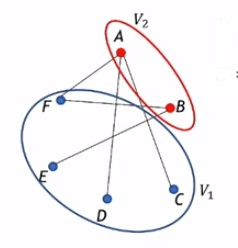

In [ ]:
vertices_2 = ['A', 'B', 'C', 'D', 'E', 'F']
grafo_bi = Grafo(False, vertices_2)

aristas = [
    ('A', 'C'),
    ('A', 'D'),
    ('A', 'F'),
    ('B', 'E'),
    ('B', 'F'),
]

for v1,v2 in aristas:
    grafo_bi.agregar_arista(v1,v2,0)

grafo_bi.mostrar_grafo()
conjunto_L, conjunto_R = grafo_bi.obtener_particion()
print(f'El conjunto derecho es: {conjunto_R}')
print(f'El conjunto izquierdo es: {conjunto_L}')

{'A': {'C': 0, 'D': 0, 'F': 0}, 'B': {'E': 0, 'F': 0}, 'C': {'A': 0}, 'D': {'A': 0}, 'E': {'B': 0}, 'F': {'A': 0, 'B': 0}}
El conjunto derecho es: {'E', 'D', 'F', 'C'}
El conjunto izquierdo es: {'A', 'B'}


In [ ]:
def construir_red_flujo(grafo_bipartito):
  """
  Precondiciones: grafo_bipartito es un grafo válido que implementa el método obtener_particion. El grafo debe ser
  bipartito.

  Postcondiciones: devuelve un grafo dirigido con vértices s (fuente) y t (sumidero). Todas las aristas desde s a L, de L a R, y de R a t
  tienen capacidad 1. Si el grafo no es bipartito, devuelve None.
  """

  L, R = grafo_bipartito.obtener_particion()
  if L is None or R is None:
    print("El grafo no es bipartito")
    return None

  fuente = 's'
  sumidero = 't'

  lista_vertices = list(grafo_bipartito.vertices.keys())
  red_flujo = Grafo(True, lista_vertices)
  red_flujo.agregar_vertice(fuente)
  red_flujo.agregar_vertice(sumidero)

  for elemento in L:
      for vertice in grafo_bipartito.vertices[elemento]:
          if vertice in R:
            red_flujo.agregar_arista(elemento, vertice, 1)

  for elemento in L:
      red_flujo.agregar_arista(fuente, elemento, 1)

  for elemento in R:
      red_flujo.agregar_arista(elemento, sumidero, 1)

  return red_flujo


In [ ]:
red_flujo = construir_red_flujo(grafo_bi)
red_flujo.mostrar_grafo()

{'A': {'C': 1, 'D': 1, 'F': 1}, 'B': {'E': 1, 'F': 1}, 'C': {'t': 1}, 'D': {'t': 1}, 'E': {'t': 1}, 'F': {'t': 1}, 's': {'A': 1, 'B': 1}, 't': {}}


In [ ]:
def copiar_grafo(grafo):
    """
    Precondiciones: grafo es una instancia válida de Grafo con estructura consistente (diccionario).
    Postcondiciones: devuelve una copia profunda del grafo original.
    La copia mantiene las mismas aristas, pesos y orientación que contiene el grafo pasado por parámetro (es_dirigido).
    """
    lista_vertices = list(grafo.vertices.keys())
    grafo_copia = Grafo(grafo.es_dirigido, lista_vertices)
    for vertice in grafo.vertices:
        for vecino in grafo.vertices[vertice]:
            peso = grafo.vertices[vertice][vecino]
            grafo_copia.agregar_arista(vertice, vecino, peso)
    return grafo_copia

In [ ]:
red_copia = copiar_grafo(red_flujo)
red_copia.mostrar_grafo()

{'A': {'C': 1, 'D': 1, 'F': 1}, 'B': {'E': 1, 'F': 1}, 'C': {'t': 1}, 'D': {'t': 1}, 'E': {'t': 1}, 'F': {'t': 1}, 's': {'A': 1, 'B': 1}, 't': {}}


In [ ]:
def buscar_camino(grafo, fuente, sumidero):
  """
  Precondiciones: grafo es una instancia de Grafo. Fuente y sumidero existen en grafo.vertices.
  Las capacidades de las aristas son números no negativos.

  Postcondiciones: Devuelve un diccionario camino que indica el padre de cada vértice en el recorrido desde la fuente hasta el sumidero.
  Si no existe camino con capacidad positiva, devuelve {} (vacío).
  """
  if fuente not in grafo.vertices or sumidero not in grafo.vertices:
      return {}

  visitados = []
  padres = {}
  elementos_encolados = Queue()
  elementos_encolados.put(fuente)

  while not elementos_encolados.empty():
      elemento_actual = elementos_encolados.get()
      visitados.append(elemento_actual)

      if elemento_actual == sumidero:
          camino = {}
          while elemento_actual != fuente:
              padre = padres[elemento_actual]
              camino[elemento_actual] = padre
              elemento_actual = padre
          return camino

      for vecino in grafo.vertices[elemento_actual]:
          capacidad = grafo.vertices[elemento_actual][vecino]
          if vecino not in visitados and capacidad > 0:
              padres[vecino] = elemento_actual
              visitados.append(vecino)
              elementos_encolados.put(vecino)
  return {}

In [ ]:
camino = buscar_camino(red_flujo, 's', 't')
print(f'Existe al menos un camino desde la fuente al sumidero y es: {camino}')

Existe al menos un camino desde la fuente al sumidero y es: {'t': 'C', 'C': 'A', 'A': 's'}


In [ ]:
def actualizar_red_residual(red, camino, fuente, sumidero, flujo):
    """
    Precondiciones: camino representa un camino válido desde fuente hasta sumidero en red.
    flujo es un número positivo menor o igual a la capacidad mínima del camino.

    Postcondiciones: La red residual se actualiza reduciendo la capacidad directa en cada arista del camino en flujo.
    Se incrementa (o crea) la capacidad inversa correspondiente.
    """
    vertice_actual = sumidero
    while vertice_actual != fuente:
        vertice_anterior = camino[vertice_actual]
        red.vertices[vertice_anterior][vertice_actual] -= flujo
        if vertice_actual not in red.vertices:
            red.vertices[vertice_actual] = {}
        if vertice_anterior not in red.vertices[vertice_actual]:
            red.vertices[vertice_actual][vertice_anterior] = 0
        red.vertices[vertice_actual][vertice_anterior] += flujo
        vertice_actual = vertice_anterior

In [ ]:
def ford_fulkerson(grafo, fuente, sumidero):
    """
    Precondiciones: grafo es un grafo dirigido con capacidades no negativas. fuente y sumidero existen en el grafo y son distintos.

    Postcondiciones: Devuelve  (flujo_maximo, red_residual) donde el flujo_maximo es el valor máximo de flujo posible desde fuente hasta sumidero y
    la red_residual refleja las capacidades finales tras aplicar el algoritmo.
    Ninguna arista en la red residual tiene capacidad negativa.
    """
    red_residual = copiar_grafo(grafo)
    flujo_maximo = 0

    while True:
        camino = buscar_camino(red_residual, fuente, sumidero)
        if not camino:
            break
        flujo = float('inf')
        vertice_actual = sumidero

        while vertice_actual != fuente:
            vertice_anterior = camino[vertice_actual]
            capacidad = red_residual.vertices[vertice_anterior][vertice_actual]
            flujo = min(flujo, capacidad)
            vertice_actual = vertice_anterior

        actualizar_red_residual(red_residual, camino, fuente, sumidero, flujo)
        flujo_maximo += flujo

    return flujo_maximo, red_residual


In [ ]:
flujo_maximo, red_residual = ford_fulkerson(red_flujo, 's', 't')
print(f'La cantidad de perfect matching es {flujo_maximo}')
print(f'La red original es:')
red_flujo.mostrar_grafo()
print(f'la red residual es:')
red_residual.mostrar_grafo()

La cantidad de perfect matching es 2
La red original es:
{'A': {'C': 1, 'D': 1, 'F': 1}, 'B': {'E': 1, 'F': 1}, 'C': {'t': 1}, 'D': {'t': 1}, 'E': {'t': 1}, 'F': {'t': 1}, 's': {'A': 1, 'B': 1}, 't': {}}
la red residual es:
{'A': {'C': 0, 'D': 1, 'F': 1, 's': 1}, 'B': {'E': 0, 'F': 1, 's': 1}, 'C': {'t': 0, 'A': 1}, 'D': {'t': 1}, 'E': {'t': 0, 'B': 1}, 'F': {'t': 1}, 's': {'A': 0, 'B': 0}, 't': {'C': 1, 'E': 1}}


In [ ]:
def obtener_matching(red_inicial, red_residual, L, R):
    matching = []
    for u in L:
        for v in red_inicial.vertices[u]:
            if v in R:
                if red_residual.vertices[u][v] == 0:
                    matching.append((u, v))
    return matching


In [ ]:
matching = obtener_matching(red_flujo, red_residual, conjunto_L, conjunto_R)
print(matching)

[('A', 'C'), ('B', 'E')]
